In [1]:
# Importa bibliotecas e define configurações iniciais
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
import math
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rc('font', size=12)
plt.rc('axes', labelsize=12)
sns.set_palette("gray")
sns.set_style("whitegrid")

# Importa e lê arquivo excel
excel_file = 'dados_partilha_mestrado.xls'
df = pd.read_excel(excel_file)

#Variáveis e seleções
df_contratado = df[df['Número ofertas']>0] #Dados de blocos que receberam ofertas
df_antes = df_contratado[0:1] # Dados de blocos leiloados antes da reforma do marco legal (apenas Libra)
df_antes_contratado = df_antes # Dados de blocos contratados antes da reforma
df_depois = df[1:] # Dados de blocos leiloados depois da reforma do marco legal (todos, com exceção de Libra)
df_depois_contratado = df_contratado[1:] # Dados de blocos contratados depois da reforma

In [2]:
# Informações do software utilizado (Python e Pandas)
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: 0.8.1
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplo

In [3]:
# Informações do software utilizado (Seaborn)
sns.__version__

'0.9.0'

In [4]:
# Análise exploratória de dados - dimensões do Dataframe
df.shape

(26, 18)

In [5]:
# Análise exploratória de dados - Dataframe
df

,Bloco,Rodada,Ano,Data realização,Bacia,Número ofertas,Excedente Óleo Ofertado (%),Ágio Excedente Óleo (%),Bônus arrematado (milhões R$),PEM arrematado (milhões R$),Conteúdo local médio – exploração (%),Conteúdo local médio – desenvolvimento (%),Volume in situ estimado (P50) (bilhões de barris),Volume recuperável estimado (bilhões de barris),Participação Petrobras (%),Participação Petrobras Volume in situ (bilhões de barris),Petrobras operadora?,Petrobras exerceu preferência?
0,Libra,1,2013,2013-10-25,Santos,1,0.4165,0.000000,15000.0,610.9,0.37,0.55,32.500,6.5000,0.40,13.0000,1.0,NaN
1,Sudoeste Tartaruga Verde,2,2017,2017-10-27,Campos,0,NaN,NaN,NaN,NaN,0.55,0.65,0.160,0.0320,NaN,NaN,NaN,0.0
2,Sul de Gato do Mato,2,2017,2017-10-27,Santos,1,0.1153,0.000000,100.0,152.0,0.38,0.60,0.200,0.0400,0.00,0.0000,0.0,0.0
3,Entorno de Sapinhoá,2,2017,2017-10-27,Santos,2,0.8000,6.736944,200.0,0.0,0.35,0.30,0.350,0.0700,0.45,0.1575,1.0,1.0
4,Norte de Carcará,2,2017,2017-10-27,Santos,2,0.6712,2.039855,3000.0,152.0,0.35,0.30,2.200,0.4400,0.00,0.0000,0.0,0.0
5,Pau Brasil,3,2017,2017-10-27,Santos,0,NaN,NaN,NaN,NaN,0.18,0.30,4.100,0.8200,NaN,NaN,NaN,0.0
6,Peroba,3,2017,2017-10-27,Santos,3,0.7696,4.540677,2000.0,152.0,0.18,0.30,5.300,1.0600,0.40,2.1200,1.0,1.0
7,Alto de Cabo Frio - Oeste,3,2017,2017-10-27,Santos,1,0.2287,0.000000,350.0,152.0,0.18,0.30,NaN,NaN,0.00,NaN,0.0,0.0
8,Alto de Cabo Frio - Central,3,2017,2017-10-27,Campos,2,0.7586,2.548176,500.0,152.0,0.18,0.30,NaN,NaN,0.50,NaN,1.0,1.0
9,Três Marias,4,2018,2018-06-07,Santos,2,0.4995,5.003606,100.0,246.0,0.18,0.30,1.910,0.3820,0.30,0.5730,1.0,1.0


In [6]:
# Análise exploratória de dados - Dados antes da reforma
df_antes

,Bloco,Rodada,Ano,Data realização,Bacia,Número ofertas,Excedente Óleo Ofertado (%),Ágio Excedente Óleo (%),Bônus arrematado (milhões R$),PEM arrematado (milhões R$),Conteúdo local médio – exploração (%),Conteúdo local médio – desenvolvimento (%),Volume in situ estimado (P50) (bilhões de barris),Volume recuperável estimado (bilhões de barris),Participação Petrobras (%),Participação Petrobras Volume in situ (bilhões de barris),Petrobras operadora?,Petrobras exerceu preferência?
0,Libra,1,2013,2013-10-25,Santos,1,0.4165,0.0,15000.0,610.9,0.37,0.55,32.5,6.5,0.4,13.0,1.0,NaN


In [7]:
# Análise exploratória de dados - Dados depois da reforma
df_depois

,Bloco,Rodada,Ano,Data realização,Bacia,Número ofertas,Excedente Óleo Ofertado (%),Ágio Excedente Óleo (%),Bônus arrematado (milhões R$),PEM arrematado (milhões R$),Conteúdo local médio – exploração (%),Conteúdo local médio – desenvolvimento (%),Volume in situ estimado (P50) (bilhões de barris),Volume recuperável estimado (bilhões de barris),Participação Petrobras (%),Participação Petrobras Volume in situ (bilhões de barris),Petrobras operadora?,Petrobras exerceu preferência?
1,Sudoeste Tartaruga Verde,2,2017,2017-10-27,Campos,0,NaN,NaN,NaN,NaN,0.55,0.65,0.160,0.0320,NaN,NaN,NaN,0.0
2,Sul de Gato do Mato,2,2017,2017-10-27,Santos,1,0.1153,0.000000,100.0,152.0,0.38,0.60,0.200,0.0400,0.00,0.0000,0.0,0.0
3,Entorno de Sapinhoá,2,2017,2017-10-27,Santos,2,0.8000,6.736944,200.0,0.0,0.35,0.30,0.350,0.0700,0.45,0.1575,1.0,1.0
4,Norte de Carcará,2,2017,2017-10-27,Santos,2,0.6712,2.039855,3000.0,152.0,0.35,0.30,2.200,0.4400,0.00,0.0000,0.0,0.0
5,Pau Brasil,3,2017,2017-10-27,Santos,0,NaN,NaN,NaN,NaN,0.18,0.30,4.100,0.8200,NaN,NaN,NaN,0.0
6,Peroba,3,2017,2017-10-27,Santos,3,0.7696,4.540677,2000.0,152.0,0.18,0.30,5.300,1.0600,0.40,2.1200,1.0,1.0
7,Alto de Cabo Frio - Oeste,3,2017,2017-10-27,Santos,1,0.2287,0.000000,350.0,152.0,0.18,0.30,NaN,NaN,0.00,NaN,0.0,0.0
8,Alto de Cabo Frio - Central,3,2017,2017-10-27,Campos,2,0.7586,2.548176,500.0,152.0,0.18,0.30,NaN,NaN,0.50,NaN,1.0,1.0
9,Três Marias,4,2018,2018-06-07,Santos,2,0.4995,5.003606,100.0,246.0,0.18,0.30,1.910,0.3820,0.30,0.5730,1.0,1.0
10,Uirapuru,4,2018,2018-06-07,Santos,4,0.7549,2.403517,2650.0,246.0,0.18,0.30,7.800,1.5600,0.30,2.3400,1.0,1.0


In [8]:
# Análise exploratória de dados - Correlações
df.dropna().corr()

# Correlações interessantes: 
# Alta e positiva entre número de ofertas e excedente em óleo/ágio do excedente
# Alta e positiva entre alta participação da Petrobras e volume estimado

,Rodada,Ano,Número ofertas,Excedente Óleo Ofertado (%),Ágio Excedente Óleo (%),Bônus arrematado (milhões R$),PEM arrematado (milhões R$),Conteúdo local médio – exploração (%),Conteúdo local médio – desenvolvimento (%),Volume in situ estimado (P50) (bilhões de barris),Volume recuperável estimado (bilhões de barris),Participação Petrobras (%),Participação Petrobras Volume in situ (bilhões de barris),Petrobras operadora?,Petrobras exerceu preferência?
Rodada,1.000000,0.648035,-0.377880,-0.371091,-0.380272,0.678395,-0.694762,-0.756084,-0.129118,0.614763,0.614763,0.609694,0.706372,0.306697,0.306697
Ano,0.648035,1.000000,-0.379440,-0.463592,-0.544009,0.449842,-0.001442,-0.841830,-0.366088,0.758972,0.758972,0.611346,0.747989,0.348125,0.348125
Número ofertas,-0.377880,-0.379440,1.000000,0.790558,0.588367,-0.236405,0.204507,0.154117,-0.253359,-0.277861,-0.277861,-0.433352,-0.405578,-0.012380,-0.012380
Excedente Óleo Ofertado (%),-0.371091,-0.463592,0.790558,1.000000,0.794919,-0.204620,-0.001898,0.302728,-0.342215,-0.223345,-0.223345,-0.447663,-0.347125,-0.090662,-0.090662
Ágio Excedente Óleo (%),-0.380272,-0.544009,0.588367,0.794919,1.000000,-0.262362,-0.131314,0.359984,-0.249045,-0.397887,-0.397887,-0.326357,-0.435076,0.103687,0.103687
Bônus arrematado (milhões R$),0.678395,0.449842,-0.236405,-0.204620,-0.262362,1.000000,-0.466038,-0.512207,-0.102431,0.733160,0.733160,0.367321,0.756742,0.194191,0.194191
PEM arrematado (milhões R$),-0.694762,-0.001442,0.204507,-0.001898,-0.131314,-0.466038,1.000000,0.162306,-0.067749,-0.225305,-0.225305,-0.374913,-0.364408,-0.253626,-0.253626
Conteúdo local médio – exploração (%),-0.756084,-0.841830,0.154117,0.302728,0.359984,-0.512207,0.162306,1.000000,0.485085,-0.611664,-0.611664,-0.602911,-0.610304,-0.425918,-0.425918
Conteúdo local médio – desenvolvimento (%),-0.129118,-0.366088,-0.253359,-0.342215,-0.249045,-0.102431,-0.067749,0.485085,1.000000,-0.217867,-0.217867,-0.296879,-0.155963,-0.372104,-0.372104
Volume in situ estimado (P50) (bilhões de barris),0.614763,0.758972,-0.277861,-0.223345,-0.397887,0.733160,-0.225305,-0.611664,-0.217867,1.000000,1.000000,0.539115,0.969971,0.321689,0.321689


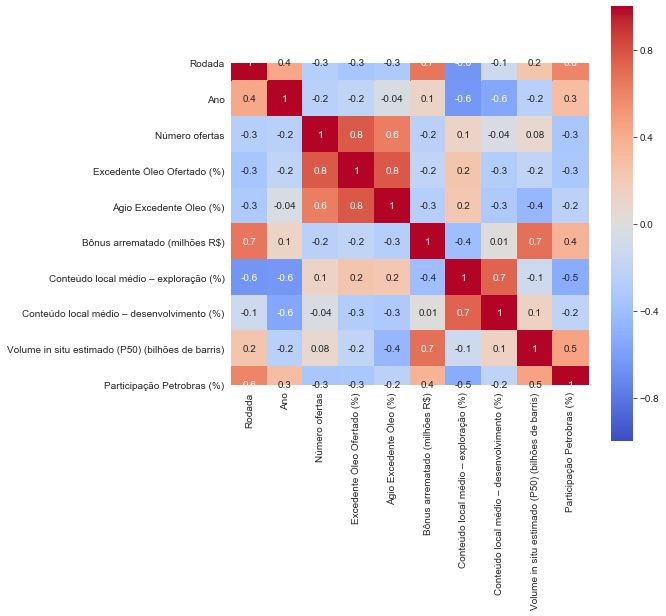

In [9]:
# Análise exploratória de dados - Correlation heatmap
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(df.iloc[:,[1,2,5,6,7,8,10,11,12,14]].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, square=True)

In [10]:
# Análise exploratória de dados - Volumes dos blocos e Participação da Petrobras
df.loc[:, ['Rodada', 'Bloco', 'Volume in situ estimado (P50) (bilhões de barris)', 'Participação Petrobras (%)']].dropna().sort_values(by='Volume in situ estimado (P50) (bilhões de barris)', ascending=False)

,Rodada,Bloco,Volume in situ estimado (P50) (bilhões de barris),Participação Petrobras (%)
0,1,Libra,32.50,0.40
17,99,Búzios,32.50,0.90
21,6,Aram,29.00,0.80
18,99,Itapu,12.50,1.00
13,5,Saturno,8.30,0.00
10,4,Uirapuru,7.80,0.30
6,3,Peroba,5.30,0.40
14,5,Titã,3.90,0.00
15,5,Pau-Brasil,3.90,0.00
12,4,Dois Irmãos,2.40,0.45


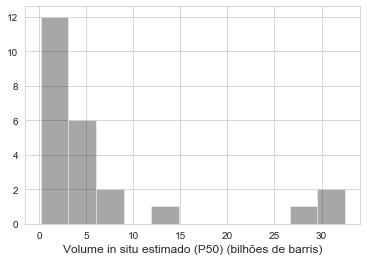

In [11]:
# Análise exploratória de dados - Distribuição dos volumes dos blocos
sns.distplot(df['Volume in situ estimado (P50) (bilhões de barris)'].dropna(), norm_hist=False, kde=False)

In [12]:
# Critério 1 (LE - aumento da competição): o número de ofertas aumentou após a reforma?
    
# Médias de ofertas por bloco antes e depois da reforma
num_ofertas_antes = df_antes['Número ofertas']
num_ofertas_depois = df_depois['Número ofertas']
num_ofertas_depois_contratado = df_depois_contratado['Número ofertas']

print('O número médio de ofertas por bloco aumentou pouco, de '+str(num_ofertas_antes.mean())+
      ' para '+str(num_ofertas_depois.mean())+' após a reforma. Considerando apenas os blocos que receberam ofertas, '+
      'a nova média foi de '+str(num_ofertas_depois_contratado.mean())+'.' )

O número médio de ofertas por bloco aumentou pouco, de 1.0 para 1.12 após a reforma. Considerando apenas os blocos que receberam ofertas, a nova média foi de 1.75.


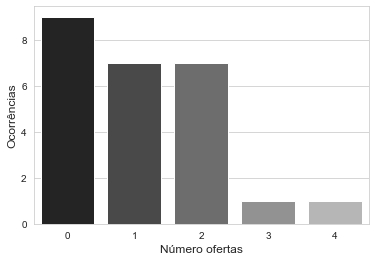

In [13]:
# Critério 1 (LE – aumento da competição): o número de ofertas aumentou após a reforma?

# Frequência de número de ofertas por bloco a partir da Rodada 2
ax = sns.countplot(x='Número ofertas', data=df_depois)
ax.set(ylabel='Ocorrências')
plt.show()

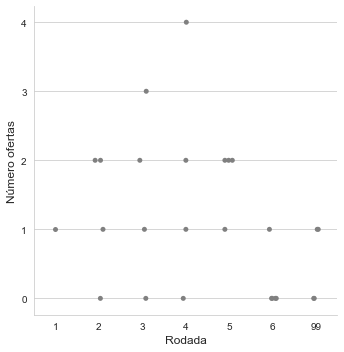

In [14]:
# Critério 1 (LE – aumento da competição): o número de ofertas aumentou após a reforma?
  
# Ofertas por bloco em cada rodada
ofertas_por_rodada = df.loc[:, ['Rodada','Número ofertas']]
g = sns.catplot(x="Rodada", y="Número ofertas", data=ofertas_por_rodada, color='gray')
for ax in g.axes.flat:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [15]:
# Critério 2 (LE – aceleração da produção): o governo conseguiu dar velocidade às contratações?
    
# Quantidade de leilões antes e depois da reforma (cada período tem aproximadamente 5 anos)
rodadas_antes = df_antes['Rodada'].nunique()
rodadas_depois = df_depois['Rodada'].nunique()
print('Antes da reforma, o governo realizou '+str(rodadas_antes)+
      ' rodada de licitação. Depois da reforma, realizou '+str(rodadas_depois)+' rodadas.')

Antes da reforma, o governo realizou 1 rodada de licitação. Depois da reforma, realizou 6 rodadas.


In [16]:
# Critério 2 (LE – aceleração da produção): o governo conseguiu dar velocidade às contratações?

# Quantidade de leilões e blocos contratados por ano
rodadas_por_ano = df_contratado.groupby('Ano').nunique().loc[:, ['Rodada', 'Bloco']]
rodadas_por_ano.rename(columns={
        'Rodada': 'Número de leilões',
        'Bloco': 'Blocos contratados'
    }, inplace=True)
rodadas_por_ano

,Número de leilões,Blocos contratados
Ano,,
2013,1,1
2017,2,6
2018,2,7
2019,2,3


In [17]:
# Critério 2 (LE – aceleração da produção): o governo conseguiu dar velocidade às contratações?

# Volume recuperável contratado antes e depois da reforma (totais)
vol_rec_antes = df_antes_contratado['Volume recuperável estimado (bilhões de barris)'].sum() #Volume recuperável contratado antes
vol_rec_depois = df_depois_contratado['Volume recuperável estimado (bilhões de barris)'].sum() #Vol. recup. contratado depois
razao = vol_rec_depois/vol_rec_antes #Razão entre volumes recuperáveis contratados depois e antes da reforma
print('Volume recuperável contratado antes da reforma: '+str(vol_rec_antes))
print('Volume recuperável contratado depois da reforma: '+str(vol_rec_depois))
print('O governo acelerou em mais de '+str(math.trunc(razao))+
      'x o ritmo das contratações em volume recuperável após a reforma.')

Volume recuperável contratado antes da reforma: 6.5
Volume recuperável contratado depois da reforma: 22.310000000000002
O governo acelerou em mais de 3x o ritmo das contratações em volume recuperável após a reforma.


In [18]:
# Critério 2 (LE – aceleração da produção): o governo conseguiu dar velocidade às contratações?

# Evolução do ritmo das contratações (volume in situ contratado por ano)
vol_in_situ_contratado_por_ano = df_contratado.groupby('Ano').sum().loc[:, ['Volume in situ estimado (P50) (bilhões de barris)']]
contrat_por_ano = pd.merge(rodadas_por_ano, vol_in_situ_contratado_por_ano, on='Ano')
contrat_por_ano.reset_index(inplace=True)
contrat_por_ano.rename(columns={
        'Volume in situ estimado (P50) (bilhões de barris)': 'Vol. in situ contratado no ano',
        }, inplace=True)
vol_acum_ao_ano = contrat_por_ano['Vol. in situ contratado no ano'].cumsum()
contrat_por_ano['Volume in situ contratado acumulado'] = vol_acum_ao_ano
contrat_por_ano

,Ano,Número de leilões,Blocos contratados,Vol. in situ contratado no ano,Volume in situ contratado acumulado
0,2013,1,1,32.50,32.50
1,2017,2,6,8.05,40.55
2,2018,2,7,29.50,70.05
3,2019,2,3,74.00,144.05


[Text(0, 0.5, 'VOIP contratado'), Text(0.5, 0, 'Ano')]

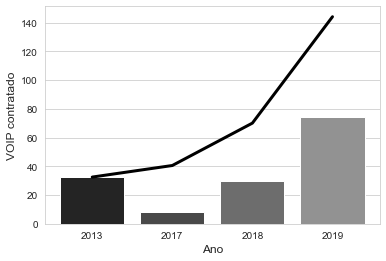

In [19]:
# Critério 2 (LE – aceleração da produção): o governo conseguiu dar velocidade às contratações?

# VOIP contratado ao longo do tempo
ax = sns.barplot(x="Ano", y="Vol. in situ contratado no ano", data=contrat_por_ano)
ax.plot(ax.get_xticks(), vol_acum_ao_ano, linewidth=3, color="Black")
ax.set(xlabel='Ano', ylabel='VOIP contratado')

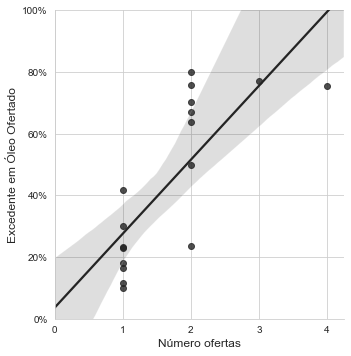

In [20]:
# Critério 3 (LE – aumento das participações governamentais): houve aumento no excedente em óleo ofertado?

# Número de ofertas versus Excedente em Óleo Ofertado. 
g = sns.lmplot(x ='Número ofertas', y ='Excedente Óleo Ofertado (%)', data=df)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel='Excedente em Óleo Ofertado', xlim=(0,None), ylim=(0,1))
plt.show()

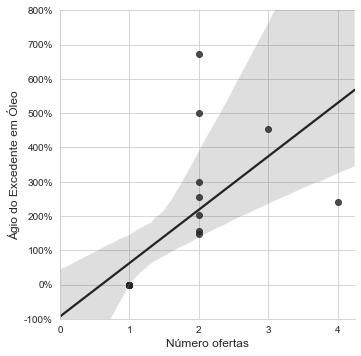

In [21]:
# Critério 3 (LE – aumento das participações governamentais): houve aumento no excedente em óleo ofertado?

# Número de ofertas versus Ágio sobre Excedente em Óleo Mínimo.
g = sns.lmplot(x ='Número ofertas', y ='Ágio Excedente Óleo (%)', data = df)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel='Ágio do Excedente em Óleo', xlim=(0,None), ylim=(-1,8))
plt.show()

In [22]:
# Critério 4 (LE – atração de investimentos): o Brasil conseguiu atrair os investimentos?

# Valores arrematados de Programa Exploratório Mínimo (PEM)
PEM_contratado_por_ano = df_contratado.groupby('Ano').sum().loc[:, ['PEM arrematado (milhões R$)']]
PEM_contratado_por_ano
contrat_por_ano = pd.merge(rodadas_por_ano, PEM_contratado_por_ano, on='Ano')
contrat_por_ano.reset_index(inplace=True)
contrat_por_ano

,Ano,Número de leilões,Blocos contratados,PEM arrematado (milhões R$)
0,2013,1,1,610.9
1,2017,2,6,760.0
2,2018,2,7,1738.0
3,2019,2,3,278.0


[Text(0, 0.5, 'PEM arrematado (milhões R$)'), Text(0.5, 0, 'Ano')]

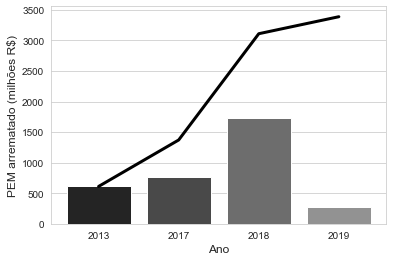

In [23]:
# Critério 4 (LE – atração de investimentos): o Brasil conseguiu atrair os investimentos?

# PEM arrematado nas rodadas de partilha
ax = sns.barplot(x="Ano", y="PEM arrematado (milhões R$)", data=contrat_por_ano)
PEM_acum_ao_ano = contrat_por_ano['PEM arrematado (milhões R$)'].cumsum()
ax.plot(ax.get_xticks(), PEM_acum_ao_ano, linewidth=3, color="Black")
ax.set(xlabel='Ano', ylabel='PEM arrematado (milhões R$)')

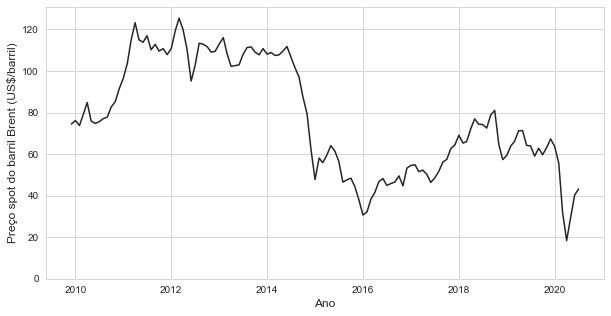

In [24]:
# Critério 4 (LE – atração de investimentos): o Brasil conseguiu atrair os investimentos?

# Preço do barril de petróleo Brent entre 2010 e 2020
register_matplotlib_converters()
df_price = pd.read_csv('Brent_Crude_Oil_Spot_Price.csv', header=4, parse_dates=['Month'], 
                       index_col= ['Month'], na_values = "999.99") # Importa os dados de preço do barril de petróleo Brent (dados da EIA)
df_price = df_price.iloc[::-1] # Filtra dados de interesse
df_price = df_price['2009-12-01':'2020-07-01']
fig, ax = plt.subplots(figsize=(10, 5)) # Plota dados
ax.plot(df_price.index.values,
       df_price['Brent Crude Oil Spot Price dollars per barrel'])
ax.set(xlabel="Ano",
       ylabel="Preço spot do barril Brent (US$/barril)", ylim=(0))
plt.show()

In [25]:
# Critério 5 (ND – redução da participação da Petrobras no pré-sal): a estatal perdeu espaço no pré-sal após a reforma?

# Exercício do direito de preferência pela Petrobras
df_direito_prefer = df_depois[df_depois['Petrobras exerceu preferência?']==1]
df_direito_prefer_contrat = df_depois_contratado[df_depois_contratado['Petrobras exerceu preferência?']==1]
perc_pref = df_direito_prefer['Bloco'].count()/df_depois['Bloco'].count()*100
perc_pref_contrat = df_direito_prefer_contrat['Bloco'].count()/df_depois_contratado['Bloco'].count()*100
print('Percentual de blocos em que a Petrobras exerceu a preferência: '+str(perc_pref)+'%')
print('Percentual de blocos contratados em que a Petrobras exerceu a preferência: '+str(perc_pref_contrat)+'%')

Percentual de blocos em que a Petrobras exerceu a preferência: 48.0%
Percentual de blocos contratados em que a Petrobras exerceu a preferência: 62.5%


In [26]:
# Critério 5 (ND – redução da participação da Petrobras no pré-sal): a estatal perdeu espaço no pré-sal após a reforma?

# Participação da Petrobras no pré-sal
part_petr_vol = df['Participação Petrobras Volume in situ (bilhões de barris)'].sum()/df['Volume in situ estimado (P50) (bilhões de barris)'].sum()*100
print('Percentual de participação da Petrobras no pré-sal (em volume in situ estimado): '+str(math.trunc(part_petr_vol))+'%')
df_petr_oper = df[df['Petrobras operadora?']==1]
perc_blocos_petr_oper = df_petr_oper['Bloco'].count()/df_contratado['Bloco'].count()*100
perc_vol_petr_oper = df_petr_oper['Participação Petrobras Volume in situ (bilhões de barris)'].sum()/df['Volume in situ estimado (P50) (bilhões de barris)'].sum()*100
print('Percentual de blocos contratados operados pela Petrobras: '+str(math.trunc(perc_blocos_petr_oper))+'%')
print('Percentual do volume do pré-sal operado pela Petrobras: '+str(math.trunc(perc_vol_petr_oper))+'%')
print('A Petrobras opera todos os blocos em que tem participação.')
part_petr_vol == perc_vol_petr_oper

Percentual de participação da Petrobras no pré-sal (em volume in situ estimado): 51%
Percentual de blocos contratados operados pela Petrobras: 64%
Percentual do volume do pré-sal operado pela Petrobras: 51%
A Petrobras opera todos os blocos em que tem participação.


True

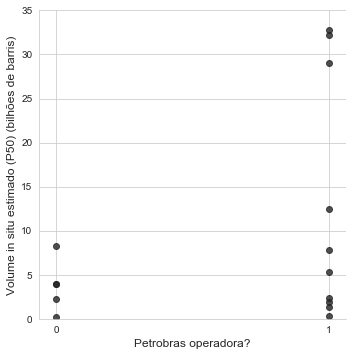

In [27]:
# Critério 5 (ND – redução da participação da Petrobras no pré-sal): a estatal perdeu espaço no pré-sal após a reforma?

# Petrobras opera todos os campos com VOIP acima de 10 bilhões boe
df_temp = df_contratado
df_temp.at[0, 'Volume in situ estimado (P50) (bilhões de barris)'] = 32.75 #altera para visualizar melhor Libra e Buzios
df_temp.at[17, 'Volume in situ estimado (P50) (bilhões de barris)'] = 32.25 #altera para visualizar melhor Libra e Buzios
g = sns.lmplot(x ='Petrobras operadora?', y ='Volume in situ estimado (P50) (bilhões de barris)', fit_reg=False, data=df_temp)
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylim=(0,35))
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

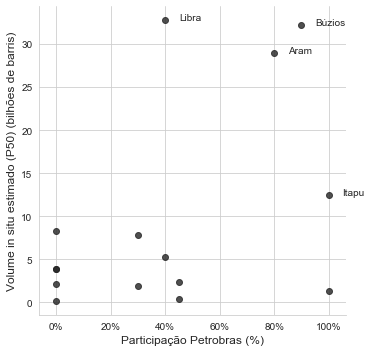

In [28]:
# Critério 5 (ND – redução da participação da Petrobras no pré-sal): a estatal perdeu espaço no pré-sal após a reforma?

# Petrobras tem participação alta nos maiores campos, com exceção de Libra

df_altoVoip = df_contratado.loc[df_contratado['Volume in situ estimado (P50) (bilhões de barris)'] > 10]

def label_point(x, y, val, ax): # função para rotular pontos [não consegui resolver bug que dá origem à mensagem de erro :'( ]
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

g = sns.lmplot(x ='Participação Petrobras (%)', y ='Volume in situ estimado (P50) (bilhões de barris)', fit_reg=False, data=df_contratado)
for ax in g.axes.flat: ax.xaxis.set_major_formatter(PercentFormatter(1)) # formata eixo x em %

label_point(df_altoVoip['Participação Petrobras (%)'] , # chama função para rotular pontos com "alto VOIP"
            df_contratado['Volume in situ estimado (P50) (bilhões de barris)'], 
            df_contratado['Bloco'], plt.gca())

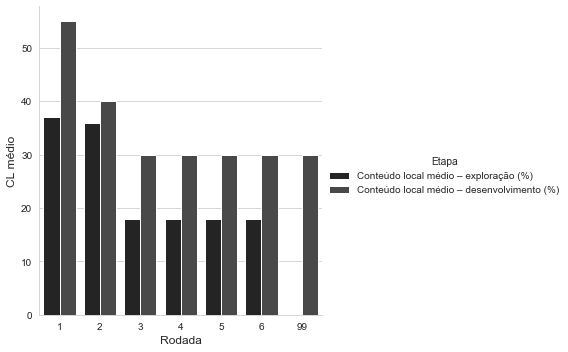

In [29]:
# Critério 6 (ND - enfraquecimento da PCL): houve prejuízo para a indústria local?

# Percentual médio de CL contratado por etapa e por rodada
CL_antes = df_antes.loc[:, ['Rodada','Conteúdo local médio – exploração (%)', 'Conteúdo local médio – desenvolvimento (%)']]
CL_depois = df_depois_contratado.loc[:, ['Rodada','Conteúdo local médio – exploração (%)', 'Conteúdo local médio – desenvolvimento (%)']]
CL = CL_antes.append(CL_depois)
CL_por_rodada = CL.groupby('Rodada').mean()*100
CL_por_rodada.reset_index(inplace=True)
CL_por_rodada = pd.melt(CL_por_rodada, id_vars="Rodada", var_name="Etapa", value_name="CL médio")
sns.catplot(x='Rodada', y='CL médio', hue='Etapa', data=CL_por_rodada, kind='bar')